In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
def plot_confusion_matrix(y_test, y_pred):
    emotions_mapping = {
        0: "Angry",
        1: "Neutral",
        2: "Happy",
        3: "Fear",
        4: "Sad"
    }

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

    # Setting x-axis labels using emotions mapping
    plt.xticks(ticks=np.arange(0.5, len(emotions_mapping)), labels=[emotions_mapping[i] for i in range(len(emotions_mapping))], rotation=45)
    
    # Setting y-axis labels using emotions mapping
    plt.yticks(ticks=np.arange(0.5, len(emotions_mapping)), labels=[emotions_mapping[i] for i in range(len(emotions_mapping))], rotation=0)

    # Iterate over each cell to place the label at the center
    for i in range(len(emotions_mapping)):
        for j in range(len(emotions_mapping)):
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

In [3]:
DATA_PATH = os.path.join("../data/processed/")

In [4]:
# Loading scaled data
X_train_scaled = pd.read_csv(os.path.join(DATA_PATH, "X_train_scaled.csv"))
X_test_scaled = pd.read_csv(os.path.join(DATA_PATH, "X_test_scaled.csv"))

# Loading pca data
X_train_pca = pd.read_csv(os.path.join(DATA_PATH, "X_train_pca.csv"))
X_test_pca = pd.read_csv(os.path.join(DATA_PATH, "X_test_pca.csv"))

# Loading lda data
X_train_lda = pd.read_csv(os.path.join(DATA_PATH, "X_train_lda.csv"))
X_test_lda = pd.read_csv(os.path.join(DATA_PATH, "X_test_lda.csv"))

# Loading data labels
y_train = pd.read_csv(os.path.join(DATA_PATH, "y_train.csv")).to_numpy().ravel()
y_test = pd.read_csv(os.path.join(DATA_PATH, "y_test.csv")).to_numpy().ravel()

In [5]:
# Xgboos return ValueError if column names contain [, ] or <

X_train_scaled.columns = X_train_scaled.columns.str.replace('[,\[\]<>]', '_', regex=True)
X_test_scaled.columns = X_test_scaled.columns.str.replace('[,\[\]<>]', '_', regex=True)

X_train_pca.columns = X_train_pca.columns.str.replace('[,\[\]<>]', '_', regex=True)
X_test_pca.columns = X_test_pca.columns.str.replace('[,\[\]<>]', '_', regex=True)

X_train_lda.columns = X_train_lda.columns.str.replace('[,\[\]<>]', '_', regex=True)
X_test_lda.columns = X_test_lda.columns.str.replace('[,\[\]<>]', '_', regex=True)

**IMPORTING RESULTS FOR BEST ALGORITHMS**
- Best algorithms based on validation score

In [7]:
y_test = pd.read_csv("../data/processed/y_test.csv")

knn_hp = pd.read_csv("../models/knn/lda.csv")
rf_hp = pd.read_csv("../models/rf/lda.csv")
xgbc_hp = pd.read_csv("../models/xgbc/scaled.csv")
mlp_hp = pd.read_csv("../models/mlp/lda.csv")

**RETRAINING AND EVALUATION**

***KNN***

In [8]:
knn_hp

,"{""algorithm"": ""ball_tree""","""metric"": ""chebyshev""","""n_neighbors"": 30","""weights"": ""distance""}"


In [12]:
knn_model = KNeighborsClassifier(n_neighbors=30, metric="chebyshev", weights="distance", algorithm="ball_tree")
knn_model.fit(X_train_lda, y_train)

knn_pred = knn_model.predict(X_test_lda)

In [13]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.65      0.33      0.44       293
           1       0.50      0.53      0.51       308
           2       0.40      0.60      0.48       329
           3       0.43      0.43      0.43       315
           4       0.81      0.69      0.74       323

    accuracy                           0.52      1568
   macro avg       0.56      0.52      0.52      1568
weighted avg       0.56      0.52      0.52      1568



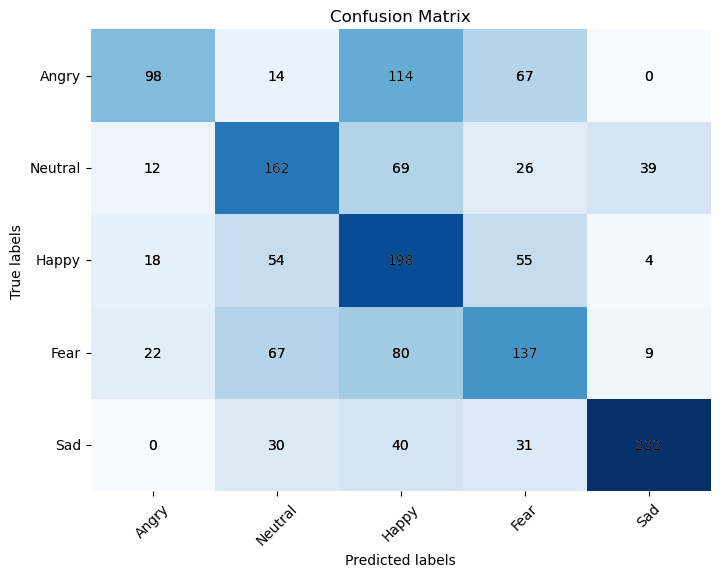

In [11]:
plot_confusion_matrix(y_test, knn_pred)

***RANDOM FOREST***

In [59]:
rf_hp

,"{""criterion"": ""gini""","""max_depth"": 10","""min_samples_split"": 5","""n_estimators"": 500}"


In [61]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, criterion="gini", min_samples_split=5)
rf_model.fit(X_train_lda, y_train)

rf_pred = rf_model.predict(X_test_lda)

In [62]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.65      0.34      0.45       293
           1       0.52      0.48      0.50       308
           2       0.40      0.60      0.48       329
           3       0.40      0.44      0.42       315
           4       0.82      0.72      0.76       323

    accuracy                           0.52      1568
   macro avg       0.56      0.52      0.52      1568
weighted avg       0.55      0.52      0.52      1568



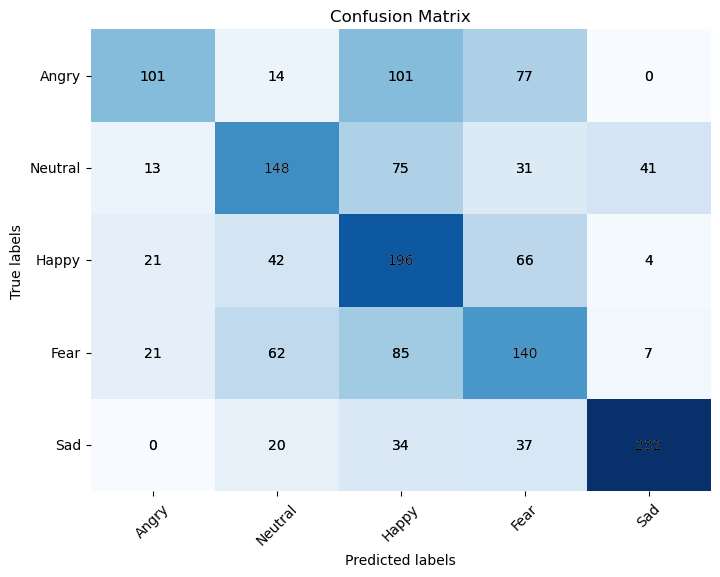

In [81]:
plot_confusion_matrix(y_test, rf_pred)

***XGB CLASSIFIER***

In [64]:
xgbc_hp

,"{""learning_rate"": 0.1","""max_depth"": 5","""n_estimators"": 500}"


In [68]:
xgb_model = XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

xgb_pred = xgb_model.predict(X_test_scaled)

In [72]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       293
           1       0.54      0.40      0.46       308
           2       0.51      0.57      0.54       329
           3       0.56      0.51      0.53       315
           4       0.70      0.86      0.77       323

    accuracy                           0.59      1568
   macro avg       0.58      0.59      0.58      1568
weighted avg       0.58      0.59      0.58      1568



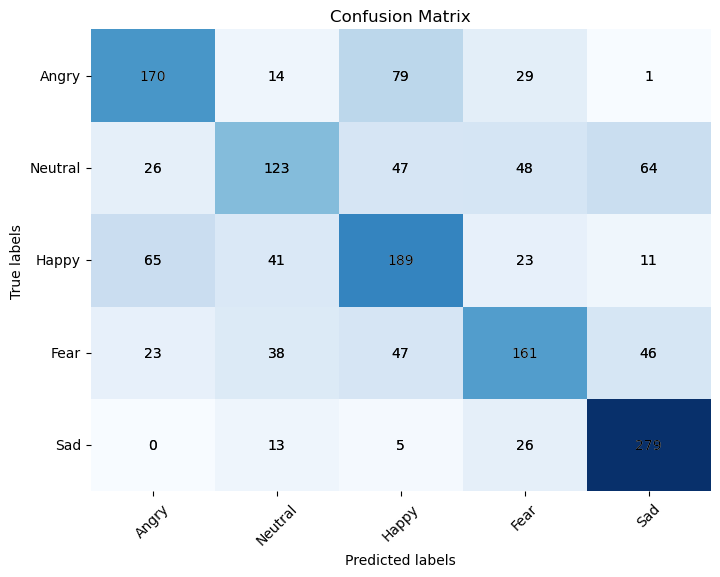

In [82]:
plot_confusion_matrix(y_test, xgb_pred)

***MLP***

In [71]:
mlp_hp

,"{""activation"": ""tanh""","""alpha"": 0.0001","""hidden_layer_sizes"": [496",32,16],"""learning_rate"": ""constant""","""max_iter"": 750","""solver"": ""sgd""}"


In [74]:
mlp_model = MLPClassifier(hidden_layer_sizes=[496, 32, 16], activation="tanh", alpha=0.0001, learning_rate="constant", solver="sgd", max_iter=750)
mlp_model.fit(X_train_lda, y_train)

mlp_pred = mlp_model.predict(X_test_lda)

In [75]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.65      0.33      0.44       293
           1       0.51      0.50      0.51       308
           2       0.40      0.62      0.49       329
           3       0.42      0.43      0.42       315
           4       0.80      0.69      0.74       323

    accuracy                           0.52      1568
   macro avg       0.56      0.51      0.52      1568
weighted avg       0.55      0.52      0.52      1568



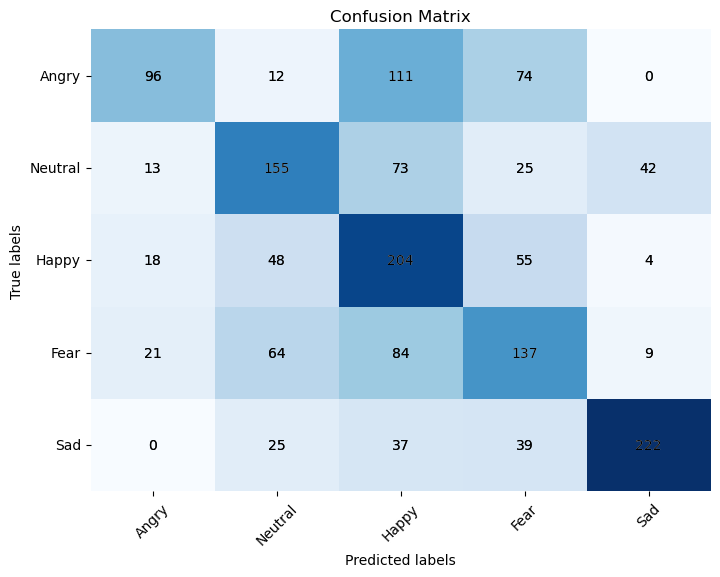

In [83]:
plot_confusion_matrix(y_test, mlp_pred)